# Active Kriging-Monte Carlo Simulation Example 1
Author: Mohit S. Chauhan Date: Aug 04, 2019

In this example, Stratified sampling is used to generate samples from Uniform distribution and sample expansion is done adaptively using AKMCS method.

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib and other necessary library for plots, but also need to import the MCS, STS and AKMCS class from UQpy.

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.SampleMethods import STS
from UQpy.SampleMethods import AKMCS
from series_system import series
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Matern
import numpy as np
import scipy.stats as sp
import time

Using UQpy STS class to generate samples for two random variables, which are normally distributed with mean 0 and variance 1.

In [2]:
np.random.seed(3)
x = STS(dist_name=['Normal']*2, dist_params=[[0, 1], [0, 1]], sts_design=[5, 5])

UQpy: Successful execution of STS design..


AKMCS class is used to generate new sample using 'U-function' as active learning function.

In [3]:
%%capture
start_time = time.time()
a = AKMCS(model='series_system.py', dist_name=['Normal']*2, dist_params=[[0, 1], [0, 1]], nsamples=10**5, doe=x.samples, lf='U',
          min_cov=0.05, n_add=1, corr_model='Exponential', n_stop=200)
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Time: ', elapsed_time)
print('Function evaluation: ', a.DoE.shape[0])
print('Probability of failure: ', a.pf, '  ', 'Covariance: ', a.cov_pf)

This figure shows the location of new samples generated using active learning function.

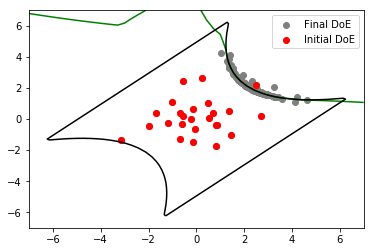

In [4]:
num = 50
x1 = np.linspace(-7, 7, num)
x2 = np.linspace(-7, 7, num)
x1v, x2v = np.meshgrid(x1, x2)
y = np.zeros([num, num])
y_act = np.zeros([num, num])
mse = np.zeros([num, num])
for i in range(num):
    for j in range(num):
        y[i, j] = a.pr(np.array([[x1v[i, j], x2v[i, j]]]))
        y_act[i, j] = series(np.array([[x1v[i, j], x2v[i, j]]]))

fig, ax = plt.subplots()
# ax = plt.axes(projection='3d')
# Plot for estimated values
kr = ax.contour(x1v, x2v, y, levels=[0], colors='Green')
# kr.cmap.set_over('green')
kr_a = ax.contour(x1v, x2v, y_act, levels=[0], colors='Black')

# Plot for scattered data
ID1 = ax.scatter(a.DoE[:, 0], a.DoE[:, 1], color='Grey', label='Final DoE')
ID = ax.scatter(x.samples[:, 0], x.samples[:, 1], color='Red', label='Initial DoE')
plt.legend(handles=[ID1, ID])
plt.show()

Probability of failure and covariance is estimated using Monte Carlo Simulation.

In [5]:
start_time = time.time()

# Code
b = MCS(dist_name=pdf, dist_params=params, nsamples=10**6)
gx = series(b.samples, k=7)
pf_mcs = np.sum(np.array(gx) < 0)/n_
cov_pf_mcs = np.sqrt((1 - pf_mcs)/(pf_mcs * n_))

elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

NameError: name 'pdf' is not defined

Results from Monte Carlo Simulation.

In [ ]:
print('Time: ', elapsed_time)
print('Function evaluation: ', n_)
print('Probability of failure: ', pf_mcs, '  ', 'Covariance: ', cov_pf_mcs)